In [17]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
data = StandardScmarket_dfaler().fit_transform(df_market_data)

In [9]:
# Create a DataFrame with the scaled data
market_df = pd.DataFrame(data, columns =df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
market_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [12]:
# Create an empty list to store the inertia values
clist = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  k_model = KMeans(n_clusters = i)
  k_model.fit(market_df)
  clist.append(k_model.inertia_)

C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [13]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k, "inertia": clist}
elbow_df = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,66.099188
5,6,52.825023
6,7,44.253334
7,8,36.837268
8,9,33.143346
9,10,29.624929


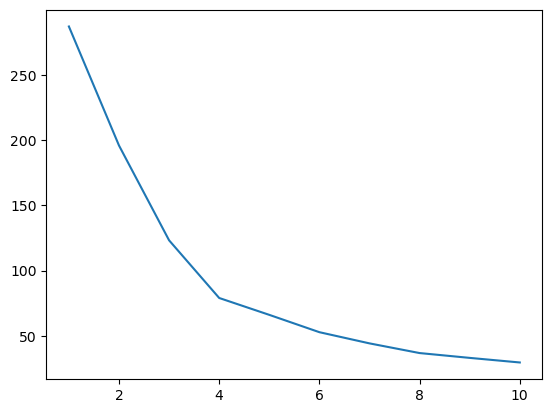

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["k"], elbow_df['inertia'])


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The bend seems to start at 4 so the best value should be 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [21]:
# Initialize the K-Means model using the best value for k
K_model = KMeans(n_clusters= 4)

In [22]:
# Fit the K-Means model using the scaled data
K_model.fit(market_df)

C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
K_pred = K_model.predict(market_df)

# Print the resulting array of cluster values.
K_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1])

In [24]:
# Create a copy of the DataFrame
K_market_df = market_df.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
K_market_df["K_predict"] = K_pred

# Display sample data
K_market_df.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,K_predict
coin_id,,,,,,,,
eos,0.155710,-0.922491,0.115024,-0.237488,-0.642837,-0.508220,-0.296330,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623,0
binance-usd,0.061339,-0.706669,-0.015321,-0.058694,0.004017,-0.550003,-0.281963,1
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,3


In [27]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


k_scatter_plot = K_market_df.hvplot.scatter(
  x="price_change_percentage_24h",
  y="price_change_percentage_7d",
  color = "K_predict",
  hover_cols=["coin_id"],
  cmap = "HighContrast"
)
k_scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,K_predict,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [29]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components= 3)

In [30]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(market_df)
df_pca = pd.DataFrame(pca_data, columns = ["PCA1","PCA2","PCA3"])
# View the first five rows of the DataFrame.
df_pca.head(5)


,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [31]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is the amount of variance capatured 0.37+ 0.34+ 0.17 =0.89 my total explained variance is 0.89. 

In [32]:
# Create a new DataFrame with the PCA data.
df_pca["coinid"] = market_df.index

# Copy the crypto names from the original data


# Set the coinid column as index
df_pca = df_pca.set_index("coinid")

# Display sample data
df_pca.sample(5)




,PCA1,PCA2,PCA3
coinid,,,
true-usd,-0.458131,-0.135734,-0.635284
theta-token,2.676868,-0.013954,-1.965207
ontology,-0.632355,-2.108117,-0.652227
cardano,-0.345600,0.729439,1.478013
tron,-0.393352,-0.108192,-0.012756


---

### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1,11))

In [35]:
# Create an empty list to store the inertia values
clist2 = []
for i in k2:
  model = KMeans(n_clusters=i)
  model.fit(df_pca)
  clist2.append(model.inertia_)




C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {"k": k2, "inertia": clist2}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_2 = pd.DataFrame(elbow_data_2)

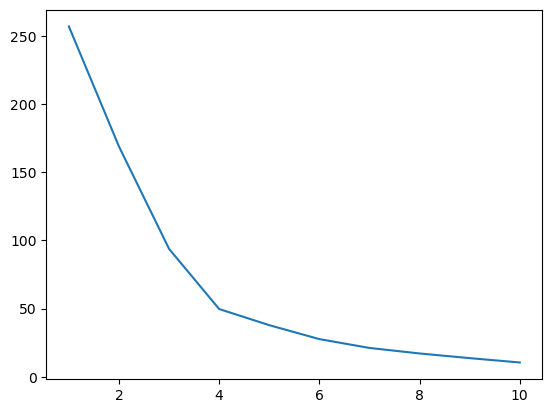

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_2 = plt.plot(elbow_df_2["k"], elbow_df_2['inertia'])
elbow_2

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** it looks similiar to the previous graph where the bend starts at 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)
model.fit(df_pca)
pred = model.predict(df_pca)
k_df_pca = df_pca.copy()
k_df_pca["KMeans"] = pred

C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [43]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
kpca = k_df_pca.hvplot.scatter(
  x="PCA1",
  y="PCA2",
  color = "KMeans",
  hover_cols=k_df_pca.index.name,
)
kpca


:Scatter   [PCA1]   (PCA2,KMeans,coinid)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

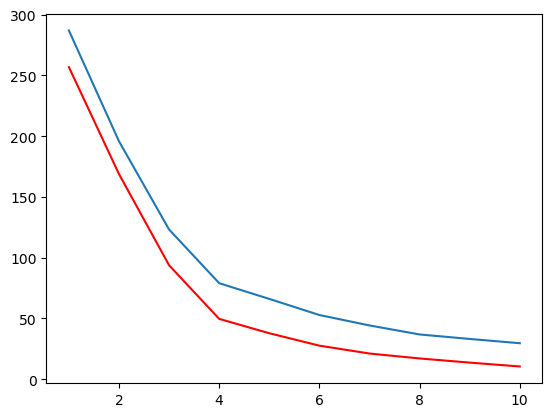

In [49]:
# Composite plot to contrast the Elbow curves
plt.plot(elbow_df["k"], elbow_df['inertia'], label='Elbow 1')


plt.plot(elbow_df_2["k"], elbow_df_2['inertia'], color='red', label='Elbow 2')
plt.show()


In [44]:
# Composite plot to contrast the clusters
composite_plot = kpca_scatter_plot * k_scatter_plot
composite_plot

:Overlay
   .Scatter.I  :Scatter   [PCA1]   (PCA2,KMeans,coinid)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,K_predict,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 